In [ ]:
import cv2
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils import np_utils

In [ ]:
attributes = pd.read_csv('list_attr_celeba.csv')
attributes.shape


print(f'There are {attributes.shape[0]} images and there are {attributes.shape[1] -1} features ')

There are 202599 images and there are 40 features 


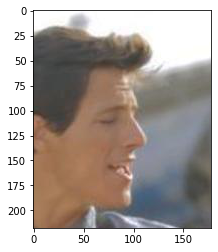

In [ ]:
image = tf.keras.preprocessing.image.load_img('img_align_celeba/img_align_celeba/000003.jpg')

image = np.array(image)

plt.imshow(image)

In [ ]:
attributes = pd.read_csv('../input/celeba-dataset/list_attr_celeba.csv')
print(attributes.columns)
gender = attributes['Male']

## Replacing the -1 values with 0
gender.replace(to_replace=-1, value=0, inplace=True)


print(f'the distribution is:{gender.value_counts()}')

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')
the distribution is:0    118165
1     84434
Name: Male, dtype: int64


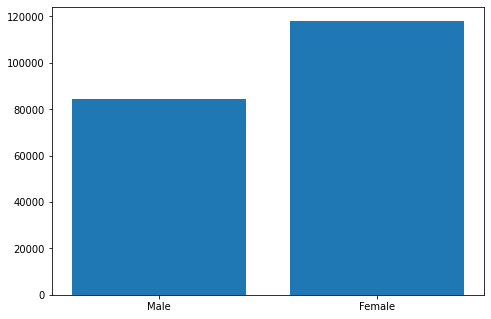

In [ ]:
## visualising the class distribution

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dist = gender.value_counts()
classes = ['Male','Female']
ax.bar(classes,[dist[1],dist[0]])
plt.show()

In [ ]:
image_id = attributes['image_id']


## Directory containing the images
dir = '../input/celeba-dataset/img_align_celeba/img_align_celeba/'
images  = [dir + addr for addr in image_id ]
## total images training + validation 
IMG_NUM = 12000
images = images[:IMG_NUM]
gender_arr = gender[:IMG_NUM]
img_arr = []

for n, image in tqdm(enumerate(images), total=len(images)):

    image = cv2.imread(image)
    image = cv2.resize(image,(150,150))
    img_arr.append(image)

100%|██████████| 12000/12000 [01:01<00:00, 194.51it/s]


# np_utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.

In [ ]:
img_arr = np.array(img_arr)
gender_arr = np_utils.to_categorical(gender_arr,2)
## splitting into training and test sets
NUM_TRAIN = 10000

x_train = img_arr[:NUM_TRAIN]
x_valid = img_arr[NUM_TRAIN:]

y_train = gender_arr[:NUM_TRAIN]
y_valid = gender_arr[NUM_TRAIN:]

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Load the InceptionV3 Pre-Trained Model
The InceptionV3 is the third iteration of the inception architecture, first developed for the GoogLeNet model.

This model was developed by researchers at Google and described in the 2015 paper titled “Rethinking the Inception Architecture for Computer Vision.”

The model expects color images to have the square shape 299×299.

The model can be loaded as follows:

# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# summarize the model
model.summary()

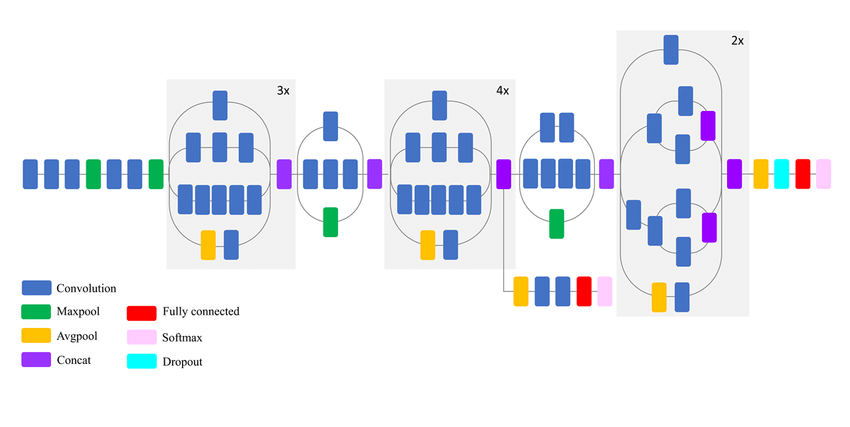



In [ ]:
inception_model = tf.keras.applications.inception_v3.InceptionV3(weights= 'imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))

x = inception_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
predictions = tf.keras.layers.Dense(2, activation="softmax")(x)


model= tf.keras.models.Model(inputs=inception_model.input, outputs=predictions)

# Lock initial layers to do not be trained
for layer in model.layers[:52]:
    layer.trainable = False

# compile the model
model.compile(optimizer = 'adam'
                    , loss='categorical_crossentropy'
                    , metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

# **Callbacks**

When training a machine learning model, we would like to have the ability to monitor the model performance and perform certain actions depending on those performance measures. 

**CSVLogger**: a callback streams epoch results to a CSV file.

In [ ]:
history = model.fit(x_train,y_train,
                    epochs = 30,
                    validation_data = (x_valid,y_valid),
                    callbacks = [tf.keras.callbacks.CSVLogger('training.csv')]
                   )

Epoch 1/30
313/313 [==============================] - 36s 77ms/step - loss: 0.5627 - accuracy: 0.7212 - val_loss: 0.7056 - val_accuracy: 0.5395
Epoch 2/30
313/313 [==============================] - 22s 70ms/step - loss: 0.2976 - accuracy: 0.8788 - val_loss: 0.2267 - val_accuracy: 0.8975
Epoch 3/30
313/313 [==============================] - 22s 70ms/step - loss: 0.2104 - accuracy: 0.9189 - val_loss: 0.1975 - val_accuracy: 0.9200
Epoch 4/30
313/313 [==============================] - 22s 70ms/step - loss: 0.1664 - accuracy: 0.9354 - val_loss: 0.2305 - val_accuracy: 0.9050
Epoch 5/30
313/313 [==============================] - 22s 70ms/step - loss: 0.1349 - accuracy: 0.9485 - val_loss: 0.1895 - val_accuracy: 0.9245
Epoch 6/30
313/313 [==============================] - 22s 70ms/step - loss: 0.1141 - accuracy: 0.9542 - val_loss: 0.1533 - val_accuracy: 0.9405
Epoch 7/30
313/313 [==============================] - 22s 70ms/step - loss: 0.0849 - accuracy: 0.9702 - val_loss: 0.2947 - val_accuracy:

In [ ]:
model.save('model.h5')

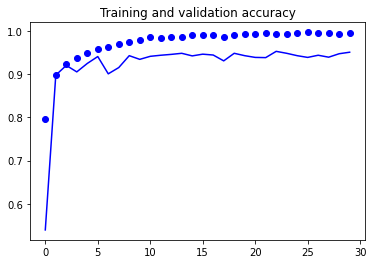

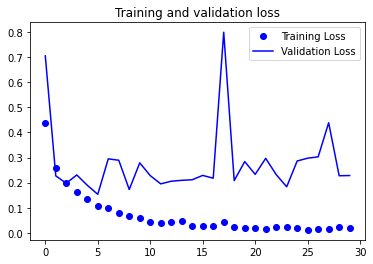

In [ ]:
## Visualising the Accuracy and loss plots

callback_csv = pd.read_csv('./training.csv')
acc = callback_csv['accuracy']
val_acc = callback_csv['val_accuracy']
loss = callback_csv['loss']
val_loss = callback_csv['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

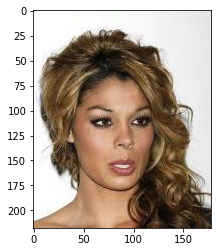

In [ ]:
image = tf.keras.preprocessing.image.load_img('img_align_celeba/img_align_celeba/000006.jpg')

image = np.array(image)

plt.imshow(image)

# **Resizing the image**

Conventionally, when dealing with images of different sizes in CNN(which happens very often in real world problems), we resize the images to the size of the smallest images with the help of any image manipulation library (OpenCV, PIL etc) or some times, pad the images of unequal size to desired size. Resizing the image is simpler and is used most often

In [ ]:

image = cv2.imread('img_align_celeba/img_align_celeba/000006.jpg')

image = cv2.resize(image,(150,150))

image = np.array(image)

image = image.reshape(1,150,150,3)

out_arr = model.predict(image)[0]

In [ ]:
##  Predicting the one hot encoding as the output
dict  = {1: 'Male', 0: 'Female'}
out_arr = model.predict(image)[0]
print(out_arr)
## converting the one hot encoding to the class output
print(f'Predicted class is : {dict[np.argmax(out_arr)]}')

[1.0000000e+00 3.7386005e-28]
Predicted class is : Female
